[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MikeS96/cv_dl/blob/main/lab1/CVwDL_Laboratorio_1_pt_2.ipynb)

# <font color='blue'>**LABORATORIO 1. VISIÓN COMPUTACIONAL CLÁSICA**

<font color='GREEN'>Integrantes:


<font color='blue'>**(60%) Problema 2: Clasificador de digitos escritos a mano** </font>

Utilizando como ejemplos de entrenamiento el dataset que viene asociado en el sklearn. Siga  las indicaciones dadas en el siguiente template para completar el ejercicio.</font>


In [ ]:
# Dataset
from sklearn.datasets import load_digits
# Images
from skimage.io import imread
from skimage.transform  import resize
from skimage.color import rgb2gray
# Classification
from sklearn.model_selection import train_test_split
from skimage.feature import hog, local_binary_pattern
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import plot_confusion_matrix
# Others
import pickle as pkl
import numpy as np
from matplotlib import pyplot as plt
import cv2
import os
from google.colab.patches import cv2_imshow

# Adicione aqui  todas las librerias que considere necesarias para resolver el problema

**ESTA ES LA AYUDA QUE VIENE CON EL DATASET, POR FAVOR LEALA ATENTAMENTE.**

Load and return the digits dataset (classification).

Each datapoint is a 8x8 image of a digit.

==================================
Classes                         10
Samples per class             ~180
Samples total                 1797
Dimensionality                  64

Features             integers 0-16

Read more in the User Guide <digits_dataset>.

Parameters

n_class : integer, between 0 and 10, optional (default=10)
    The number of classes to return.

return_X_y : boolean, default=False.
    If True, returns (data, target) instead of a Bunch object.
    See below for more information about the data and target object.

Returns

data : Bunch
    Dictionary-like object, the interesting attributes are:
    'data', the data to learn, 'images', the images corresponding
    to each sample, 'target', the classification labels for each
    sample, 'target_names', the meaning of the labels, and 'DESCR',
    the full description of the dataset.

(data, target) : tuple if return_X_y is True

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

Examples

To load the data and visualize the images:

>>> from sklearn.datasets import load_digits
>>> digits = load_digits()
>>> print(digits.data.shape)
(1797, 64)
>>> import matplotlib.pyplot as plt #doctest: +SKIP
>>> plt.gray() #doctest: +SKIP
>>> plt.matshow(digits.images[0]) #doctest: +SKIP
>>> plt.show() #doctest: +SKIP

In [ ]:
#Cargando el dataset a la variable digitos
digitos = load_digits( )

## 2.a Upload and get to know the dataset
<font color="green">**(2.5%) 2a. Reconociendo la base de datos.**
Partiendo de la ayuda anterior:
Imprima el tamaño de los datos.
Muestre en pantalla la imagen 175.
Imprima el label asociado a la imagen.

In [ ]:
shape_data = digitos.data.shape
print('The dimension of the dataset is {} where {} are the number of samples and {} are the number of pixels per image'.format(shape_data, shape_data[0], shape_data[1]))

The dimension of the dataset is (1797, 64) where 1797 are the number of samples and 64 are the number of pixels per image


<Figure size 432x288 with 0 Axes>

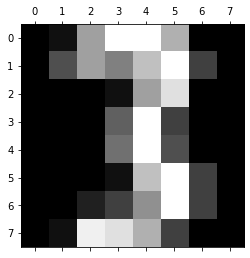

The target of the index 175 is : 3


In [ ]:
# Data returns a flat array
# Images return an array of 8x8
idx = 175
image, target = digitos.images[idx], digitos.target[idx]
plt.gray() 
plt.matshow(image) 
plt.show() 
print('The target of the index {} is : {}'.format(idx, target))

## 2.b HOG Process
<font color="green">(15%) 2b. Obtenga el vector de características para cada imagen del dataset. Usted puede hacer uso de la función dada en clase, pero le toca realizar cambios acordes a la forma como vienen presentados los datos en este caso.

HOG is a feature descriptor used to detect objects. This algorithm counts the occurrences of the orientation gradient in localized portions of an image - detection window, or region of interest.

In [ ]:
def preprocesando_hog(img_g):
  img_r = resize(img_g, (64,32))
  
  fd,hog_im= hog(img_r,orientations=9,pixels_per_cell=(8, 8), 
                 cells_per_block=(2,2), block_norm='L2', visualize=True, multichannel=False)
  return fd

**preprocesando_hog**: This is a method that resize the input image to the new dimensions 64x32, in order to extract more features with HOG, using the configuration of: 9 orientations, 8x8 pixels by cell, 2x2 cells per block, and L2 normalization.

In [ ]:
#Aqui puede escribir el codigo para leer secuencialmente las imagenes del dataset, 
#usar la funcion e ir llenando las listas de caracteristicas y etiquetas
idx = 175
image, target = digitos.images[idx], digitos.target[idx]
fd = preprocesando_hog(image)
print('The number of features are: {}'.format(fd.size))

The number of features are: 756


From image id 175, the number of features obtained using the previous HOG configuration is 756.

In [ ]:
# Parsing the dataset
def process_all(images, targets):
  hog_features = []
  labels = []
  # For each file in the folder...
  for img, label in zip(images, targets):
    his = preprocesando_hog(img)
    hog_features.append(his)
    # Append label
    labels.append(label)
  return hog_features, labels

In [ ]:
# Processing dataset
hog_features, labels = process_all(digitos.images, digitos.target)

The same previous process is done this time for each element in the dataset, with the method ```process_all``` using all images, obtaining the whole set of features from HOG and their respective labels.



In [ ]:
#Conviritendo las listas a arreglos
hog_features = np.array(hog_features)
labels = np.array(labels)
print('The size of the features are: {}'.format(hog_features.shape))
print('The size of the targets are: {}'.format(labels.shape))

The size of the features are: (1797, 756)
The size of the targets are: (1797,)


In [ ]:
from sklearn.model_selection import train_test_split

# As the dataset is ordered, lets shuffle!
x_train, x_test, y_train, y_test = train_test_split(hog_features, labels, test_size = 0.3, shuffle = True, stratify = labels)
# Printting
print('The training samples shape are: {}'.format(x_train.shape))
print('The target samples for training are: {}\n'.format(y_train.shape))
print('The test samples shape are: {}'.format(x_test.shape))
print('The target samples for testing are: {}'.format(y_test.shape))

The training samples shape are: (1257, 756)
The target samples for training are: (1257,)

The test samples shape are: (540, 756)
The target samples for testing are: (540,)


##2.c Training MLP with HOG

<font color="green">(2.5%) 2c. Diseñe su MLP para clasificar digitos.


In [ ]:
# Training
mlp = MLPClassifier(hidden_layer_sizes = (256, 128,64), activation = 'relu',
                    solver = 'adam', random_state = 1,max_iter = 1500).fit(x_train, y_train)
# Testing

print('The train accuracy is: {}'.format(mlp.score(x_train, y_train)))
print('The test accuracy is: {}'.format(mlp.score(x_test, y_test)))

The train accuracy is: 1.0
The test accuracy is: 0.9925925925925926


A MLP is created with hidden layers set as (256,128,64) using Relu as activation function, and Adam as optimization algorithm, with a max number of iterations of 1500, using the previous preprocessed data for training, obtaining a test accuracy of 99.25%

## 2.d Confusion matrix

<font color="green">(2.5%) 2d. Imprima la matriz de confusión y explique los resultados obtenidos 


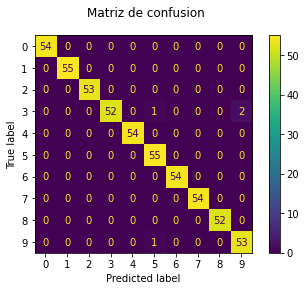

In [ ]:
labels_tag = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
mc = plot_confusion_matrix(mlp, x_test, y_test, display_labels = labels_tag)
mc.figure_.suptitle('Matriz de confusion')
plt.show()

This is the confusion matrix using the test dataset, the model inference shows very good results with a very low rate of false negatives and false positives. The confusion matrix allows us to evaluate the performance of the model in classifying the digits. These results show that 3 can be classified as 5 or 9 in some scenarios which leads us to think that some features in both digits may be repeated, or at least within the dataset. Overall, the MLP shows a good performance.

## 2.e Export MLP model
<font color="green">(2.5%) 2e. Salve la red entrenada.


In [ ]:
# Saving model
pkl.dump(mlp, open('mlp_hog.sav', 'wb'))

We export the MLP model in the disk with the name ```mlp_hog.sav``` 

## 2.f LBP
<font color="green">  (20%) 2f. Entrene una nueva red pero esta vez use  características LBP. Salvela </font>

**Local Binary Patterns** It is a simple but highly effective descriptive technique for object classification that filters adjacent pixels by given considerations and obtains a representative binary value.  It encodes the ratio of the central pixel to the color intensity of surrounding pixels. Due to its high discriminatory capacity, it is a common approach for the solution of a multitude of problems. Probably one of its most important characteristics is the robustness of its invariant to light variations.

In [ ]:
def preprocesando_lbp(img):
  img = resize(img, (64,64))  
  lbp = local_binary_pattern(img, P = 8, R = 1, method = 'default')
  return lbp

The preprocess algorithm consists in resizing the image to 64x64 in order to obtain better features from the digits.

In [ ]:
# Method to compute histogram
def compute_hist(lbp_hist, n_bins: int, range_values: tuple):
  # Plotting histogram
  (hist, _) = np.histogram(lbp_hist.ravel(), bins =n_bins, range = range_values)
  # normalizing the histogram
  hist = hist.astype('float')
  hist /= (hist.sum() + 1e-7)
  return hist

Once with the LBP histogram, a new numpy histogram is computed, and its values are normalized.

The number of features are: (64, 64)


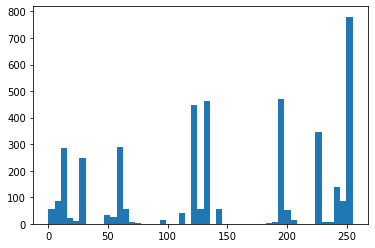

In [ ]:
#Aqui puede escribir el codigo para leer secuencialmente las imagenes del dataset, 
#usar la funcion e ir llenando las listas de caracteristicas y etiquetas
idx = 175
image, target = digitos.images[idx], digitos.target[idx]
lbp = preprocesando_lbp(image)
# PRINTING
print('The number of features are: {}'.format(lbp.shape))
# Printing LBP histogram
plt.hist(lbp.ravel(), bins = np.linspace(0, 255, 50))
#plt.axis('off')
plt.show()

The feature matrix size is 64x64

In [ ]:
norm_hist = []
lbp_list = []
labels = []
# Number of bins 
number_bins = 128
# Value of the bins
bins_vals = (0, 255)
for img, label in zip(digitos.images, digitos.target):
  # Compute lbp
  lbp_hist = preprocesando_lbp(img)
  lbp_list.append(lbp_hist)
  # Compute histogram
  curr_hist = compute_hist(lbp_hist, number_bins, bins_vals)
  norm_hist.append(curr_hist)
  # Append label
  labels.append(label)

Using the ```preprocesando_lbp``` method, all the dataset is processed and with their features computed the histogram. The number of Bins (features) within the histogram were set as 128.

In [ ]:
#Conviritendo las listas a arreglos
lbp_features = np.array(norm_hist)
labels = np.array(labels)
print('The size of the features are: {}'.format(lbp_features.shape))
print('The size of the targets are: {}'.format(labels.shape))

The size of the features are: (1797, 128)
The size of the targets are: (1797,)


In [ ]:
#Esta funcion le sirve para dividir los datos en train  y test.
from sklearn.model_selection import train_test_split

# As the dataset is ordered, lets shuffle!
x_train, x_test, y_train, y_test = train_test_split(lbp_features, labels, test_size = 0.3, shuffle = True, stratify = labels)
# Printting
print('The training samples shape are: {}'.format(x_train.shape))
print('The target samples for training are: {}\n'.format(y_train.shape))
print('The test samples shape are: {}'.format(x_test.shape))
print('The target samples for testing are: {}'.format(y_test.shape))

The training samples shape are: (1257, 128)
The target samples for training are: (1257,)

The test samples shape are: (540, 128)
The target samples for testing are: (540,)


In [ ]:
# Training
mlp = MLPClassifier(hidden_layer_sizes = (256, 128, 64), activation = 'tanh',
                    solver = 'adam', random_state = 1, max_iter = 1500).fit(x_train, y_train)
# Testing

print('The train accuracy is: {}'.format(mlp.score(x_train, y_train)))
print('The test accuracy is: {}'.format(mlp.score(x_test, y_test)))

The train accuracy is: 0.9697692919649961
The test accuracy is: 0.8203703703703704


A MLP is created with hidden layers set as (256,128,64) using Relu as activation function, and Adam as optimization algorithm, with a max iteration of 1500, using the previous preprocessed data for training, obtaining a test accuracy of 82.03%

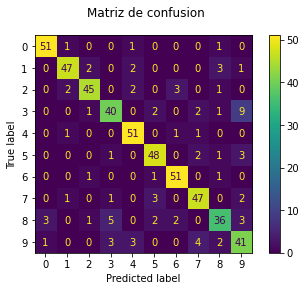

In [ ]:
labels_tag = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
mc = plot_confusion_matrix(mlp, x_test, y_test, display_labels = labels_tag)
mc.figure_.suptitle('Matriz de confusion')
plt.show()

Analyzing the confusion matrix we can see that the model using LBP features has an inferior performance than the model trained using HOG features, because there are many false positives and negatives. The confusion matrix leads us to understand that the accuracy of the model is low, we see that against the test images there are many errors, and comparing it with the results obtained from HOG we can think that it is possible that it does not fulfill the task as good as HOG.



In [ ]:
# Saving model
pkl.dump(mlp, open('mlp_lbp.sav', 'wb'))

We export the MLP model in the disk with the name ```mlp_lbp.sav``` 

## 2.h Digits detection and models comparison
<font color="green">(15%) 2h. Utilice todos los conocimientos adquiridos, para separar los dígitos escritos en la imagen adjunta: real_hw.jpg

<font color="green"> Adicione las líneas de código necesarias para evaluar su red sobre cada dígito extraido de la imagen dada. (Use model.predict)

<font color="green">Compare los resultados obtenidos y de sus propias conclusiones.

### Digits

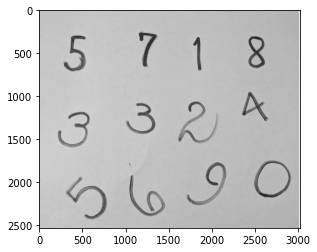

In [ ]:
# Plotting image
img = cv2.imread('real_hw.jpg')
img_g = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_g, cmap = 'gray')
plt.show()

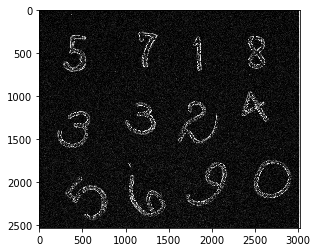

In [ ]:
img_gauss = cv2.GaussianBlur(img_g, (5, 5), 0)
img_gauss = cv2.GaussianBlur(img_gauss, (5, 5), 0)
img_gauss = cv2.GaussianBlur(img_gauss, (5, 5), 0)
img_gauss = cv2.GaussianBlur(img_gauss, (5, 5), 0)
img_gauss = cv2.GaussianBlur(img_gauss, (5, 5), 0)

img_lpc = cv2.Laplacian(img_gauss, cv2.CV_64F, ksize = 5)
img_lpc_8u = np.uint8(np.absolute(img_lpc))
plt.imshow(img_lpc_8u, cmap = 'gray', interpolation = 'nearest')
plt.show()

The image is preprocessed, in order to extract the edges of only the numbers that are presented, for this first test we use 5 Gaussian filters and calculate the Laplacian, which leaves us the above image, in which it is possible to see the numbers easily.

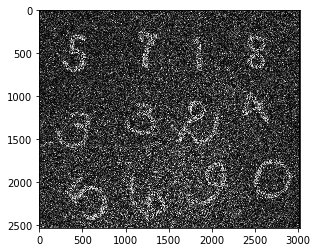

In [ ]:
# Con esto no funciona tan bien
img_gauss = cv2.GaussianBlur(img_g, (3, 3), 0)
sobelx64f = cv2.Sobel(img_g,cv2.CV_64F,1,0,ksize=5)
sobely64f = cv2.Sobel(img_g,cv2.CV_64F,0,1,ksize=5)
img_sobel = cv2.addWeighted(sobelx64f, 0.5, sobely64f, 0.5, 0.0)
img_sobel_8u = np.uint8(np.absolute(img_sobel))

#img_sobel_8u = np.uint8(np.absolute(sobelx64f))
plt.imshow(img_sobel_8u, cmap = 'gray', interpolation = 'nearest')
plt.show()

In the second test, we tried a horizontal and vertical Sobel filter, which gave us a very noisy image, so we decided to use the laplacian version.

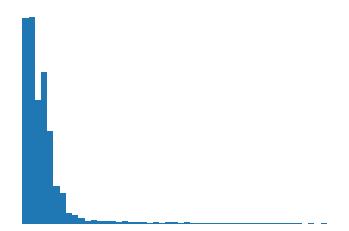

In [ ]:
plt.hist(img_lpc_8u.ravel(), bins = np.linspace(0, 255, 50))
plt.axis('off')
plt.show()

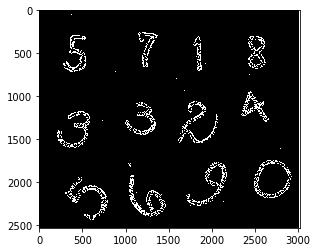

In [ ]:
ret, img_thresh = cv2.threshold(img_lpc_8u, 64, 255, cv2.THRESH_BINARY)
#img_threshth2 = cv2.adaptiveThreshold(img_sobel_8u,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)

plt.imshow(img_thresh, cmap = 'gray', interpolation = 'nearest')
plt.show()

From the histogram above, a threshold was applied to the image starting at value 64, in order to eliminate as much noise as possible from the image.

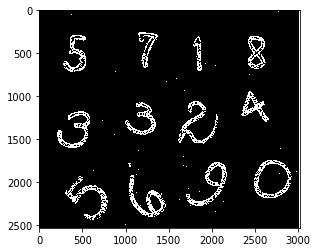

In [ ]:
img_thresh = cv2.dilate(img_thresh, (5, 5), iterations = 3)
plt.imshow(img_thresh, cmap = 'gray', interpolation = 'nearest')
plt.show()

We apply a dilation to the image in order to join the most separated points of the numbers and thus facilitate the process of contour detection.

In [ ]:
contours, hierarchy = cv2.findContours(img_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

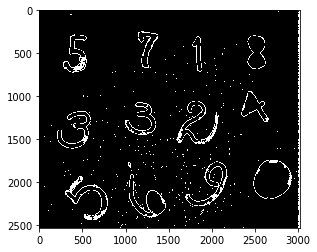

In [ ]:
img_contour = cv2.drawContours(np.zeros(img_thresh.shape), contours, -1, (255,255,255), 7)
plt.imshow(img_contour, cmap = 'gray', interpolation = 'nearest')
plt.show()

We extract the contours from the image, which generates the numbers as expected, along with many contours from the noise that could not be removed.

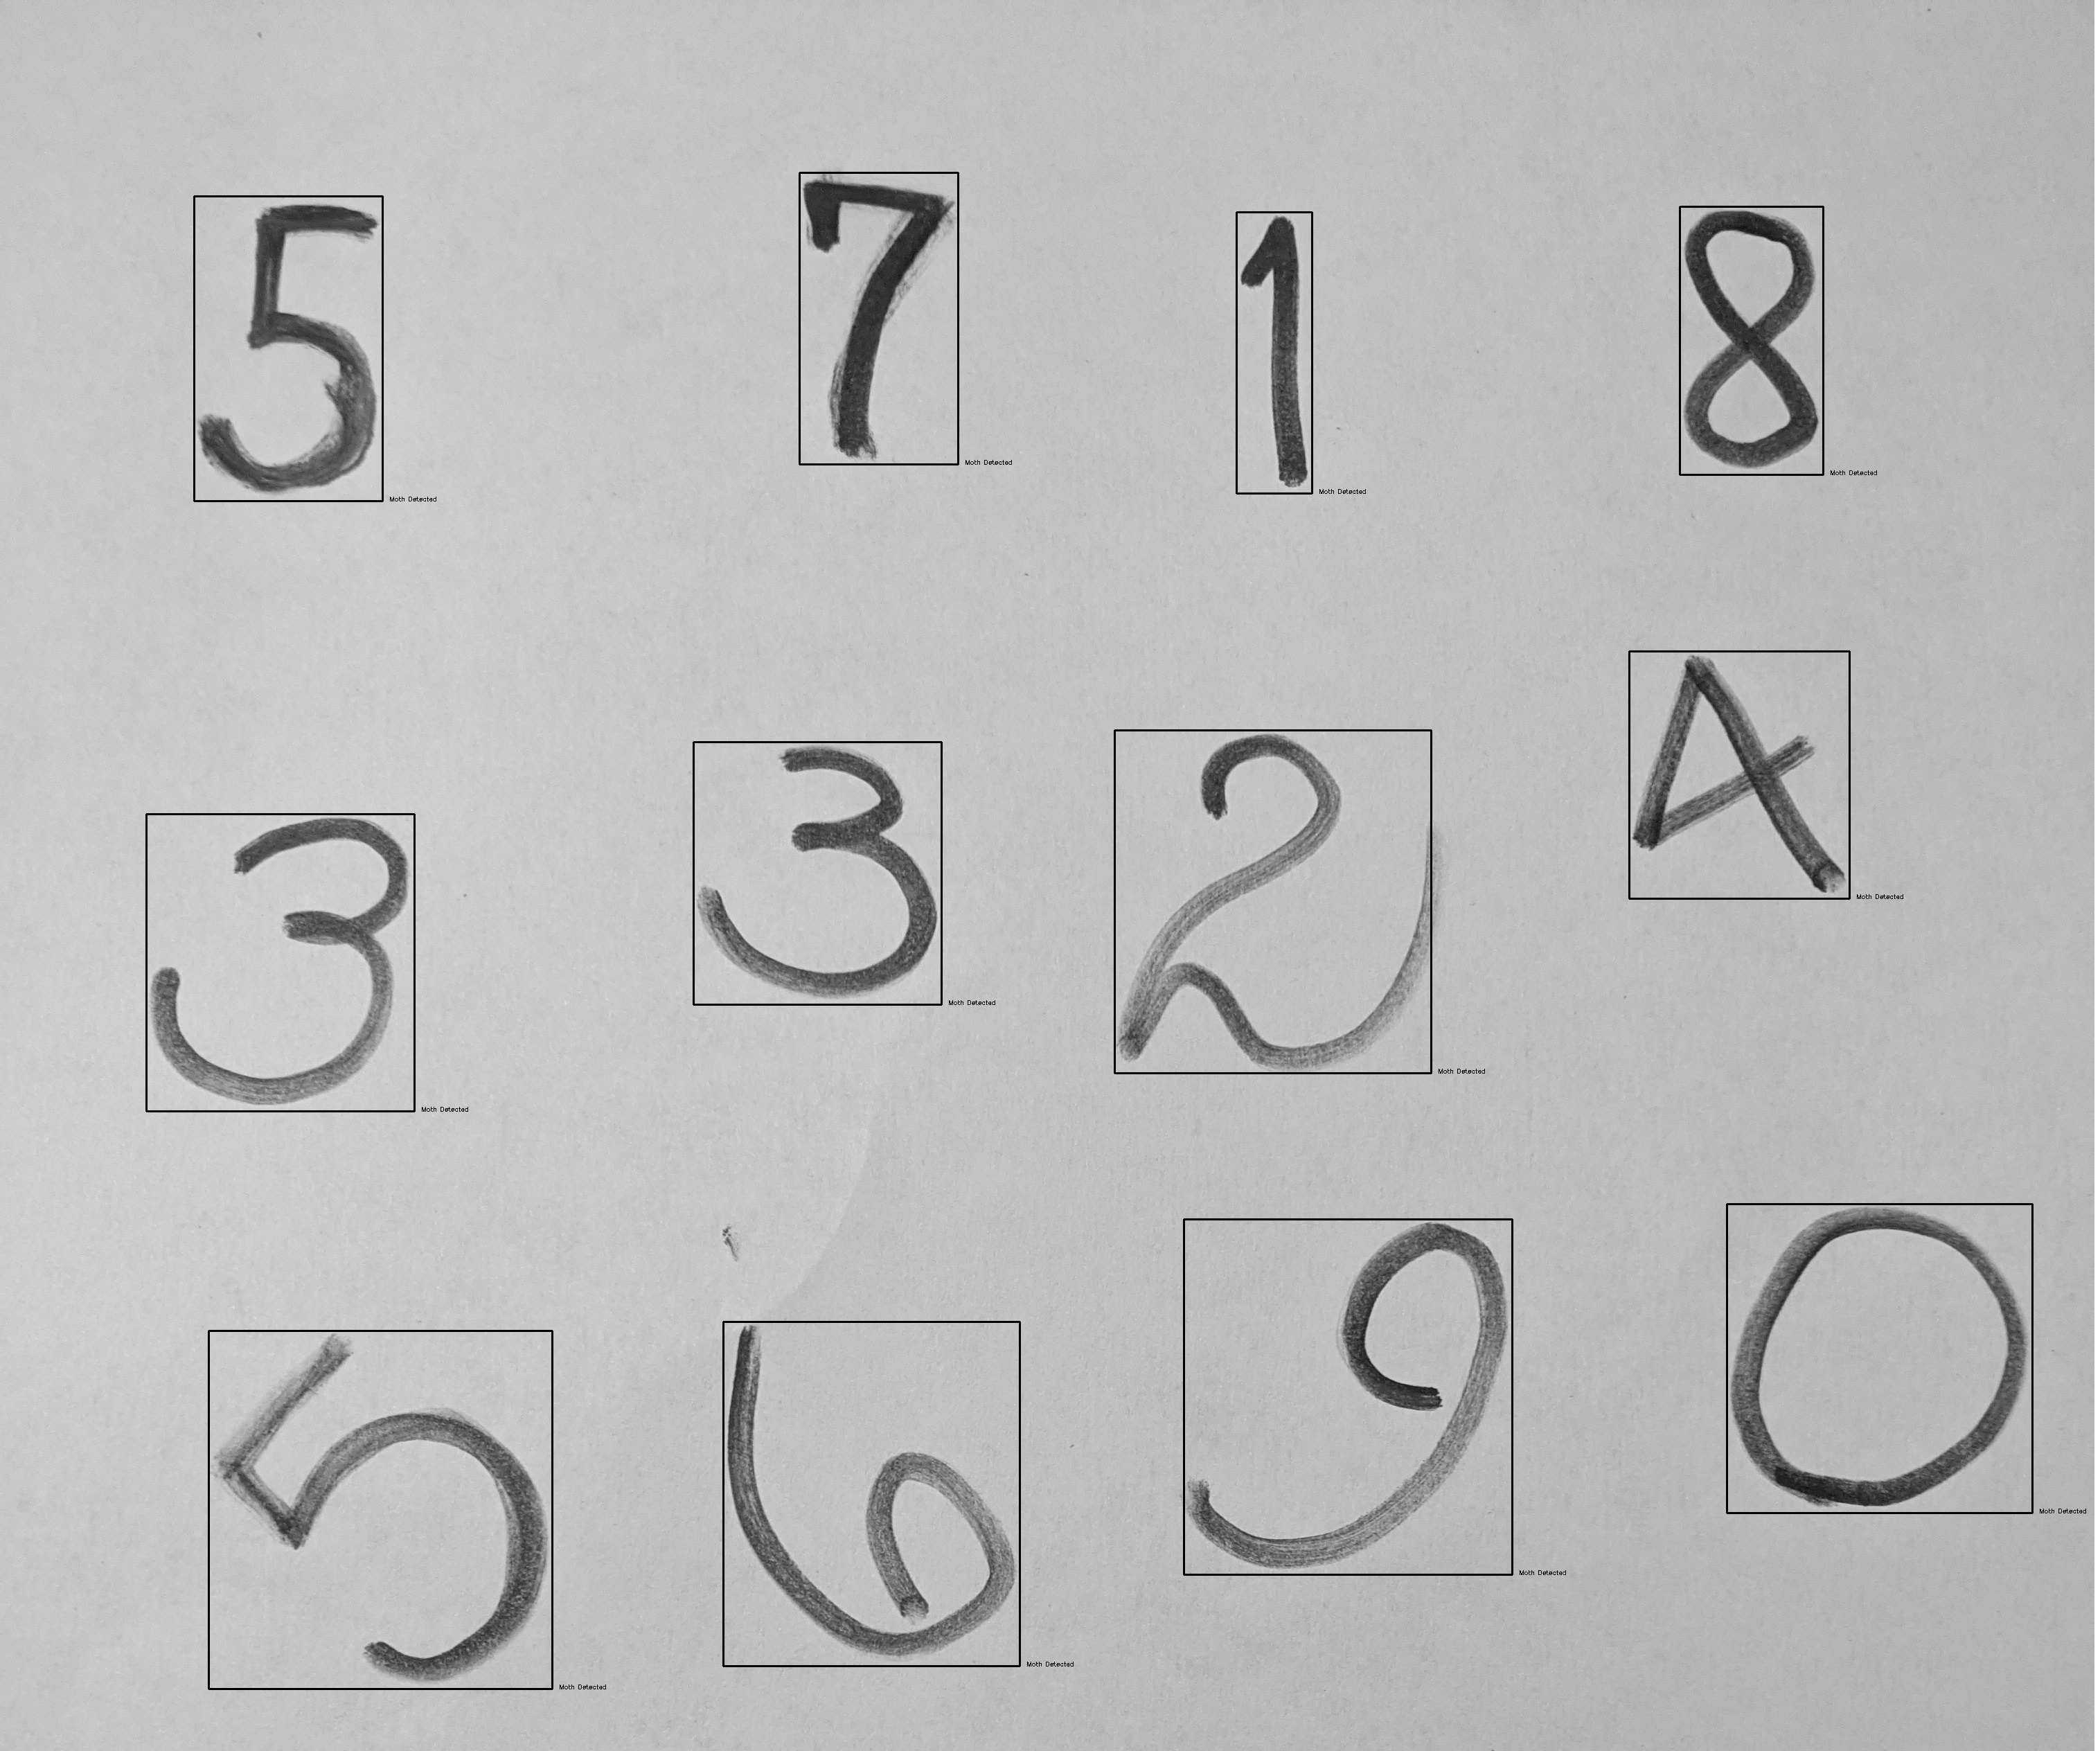

In [ ]:
img_draw = img_g.copy()
good_contours = []
for c in contours:
    rect = cv2.boundingRect(c)
    if rect[2] < 100 or rect[3] < 100: 
      continue
    #print(rect)
    x,y,w,h = rect
    good_contours.append(rect)
    rect = cv2.rectangle(img_draw,(x,y),(x+w,y+h),(0,255,0),2)
    cv2.putText(img_draw,'Moth Detected',(x+w+10,y+h),0,0.3,(0,255,0))

cv2_imshow(img_draw)

Taking into account the above, the rectangle surrounding the contour is extracted using the OpenCV functions, comparing each of the rectangles with a minimum value in order to eliminate the contours that were generated from the noise, obtaining the contours around each of the numbers in the image.

In [ ]:
# Offset in X and H
offset_x = 80
offset_y = 0
list_images = []

for x,y,w,h in good_contours:
  new_x = x - offset_x
  new_y = y - offset_y
  new_w = w + (offset_x * 2)
  new_h = h + (offset_y * 2)
  crop_img = img_g[new_y:new_y+new_h, new_x:new_x+new_w]
  list_images.append(crop_img)
#5 , 6, 9, 0, 3, 3, 2,4, 1, 8, 5, 7

Once the digits contours are obtained, we proceed to add an offset in x axis to the image in order to standardize it to the training images.

### Format image

In [ ]:
def format_img(img):
  resized = cv2.resize(img, (64, 64), interpolation = cv2.INTER_AREA)
  # Normalize from 0 to 16
  normalized = cv2.normalize(src = resized, dst = None, alpha = 0, beta = 16, norm_type = cv2.NORM_MINMAX)
  result = 16 - normalized
  _,result = cv2.threshold(result, 3, 16,cv2.THRESH_TOZERO)  
  return result

It is necessary to format the image to pass it to the descriptors and test its operation, for this, the image size is changed to 64x64, it is normalized using numpy and a threshold to zero is applied in order to standardize it to the training images.

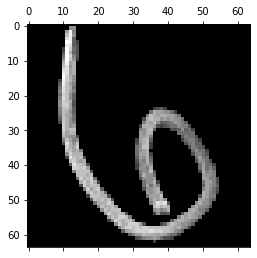

In [ ]:
new_img = format_img(list_images[1])
plt.matshow(new_img) 
plt.show()

Finally this is the final number extracted from the original image once the previous process has been applied, for this example the number 6 is shown.

### With HoG

In [ ]:
true_labels = [5, 6, 9, 0, 3, 3, 2,4, 1, 8, 5, 7]
# Processing
new_img = format_img(list_images[2])
his = preprocesando_hog(new_img)
his = np.array(his).reshape(1, -1)
print('The shape of the features is: {}'.format(his.shape))

The shape of the features is: (1, 756)


In [ ]:
mlp_stored = pkl.load(open('mlp_hog.sav', 'rb'))

Prediction:  [5]


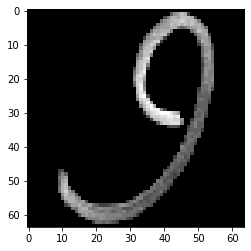

In [ ]:
resultado = mlp_stored.predict(his)
print('Prediction: ',resultado)
plt.imshow(new_img, cmap = 'gray', interpolation = 'nearest')
plt.show()

#### Inference new digits HOG

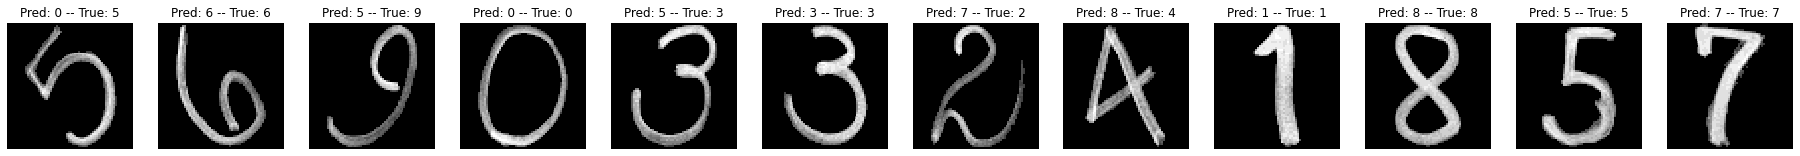

The accuracy with the new digits are: 0.5833333333333334
The number of new digits well classified are:  7


In [ ]:
pred_labels = []
_, axes = plt.subplots(nrows=1, ncols=12, figsize=(32, 32))
for ax, image, label in zip(axes, list_images, true_labels):
  image_r = format_img(image)
  his = preprocesando_hog(image_r)
  his = np.array(his).reshape(1, -1)
  res = mlp_stored.predict(his)[0]
  pred_labels.append(res)
  ax.set_axis_off()
  ax.imshow(image_r, cmap =  'gray', interpolation='nearest')
  ax.set_title('Pred: {} -- True: {}'.format(res, label))
plt.show()

true_pred = sum(1 for x,y in zip(pred_labels, true_labels) if x == y) 
print('The accuracy with the new digits are: {}'.format(true_pred/ float(len(true_labels))))
print('The number of new digits well classified are: ',true_pred)


Finally, we tested all the image digits in the MLP trained with HOG features, obtaining an accuracy of 58.3% that translates a 7 well classified digits.

### With LBP

In [ ]:
new_img = format_img(list_images[0])
# Number of bins 
number_bins = 128
# Value of the bins
bins_vals = (0, 255)
# Processing
lbp_hist = preprocesando_lbp(new_img)
# Compute histogram
curr_hist = compute_hist(lbp_hist, number_bins, bins_vals)
curr_hist = np.array(curr_hist).reshape(1, -1)
print('The shape of the histogram is: {}'.format(curr_hist.shape))

The shape of the histogram is: (1, 128)


In [ ]:
mlp_stored_lbp = pkl.load(open('mlp_lbp.sav', 'rb'))

[1]


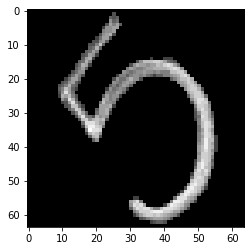

In [ ]:
resultado = mlp_stored_lbp.predict(curr_hist)
print(resultado)
plt.imshow(new_img, cmap = 'gray', interpolation = 'nearest')
plt.show()

#### Inference new digits LBP

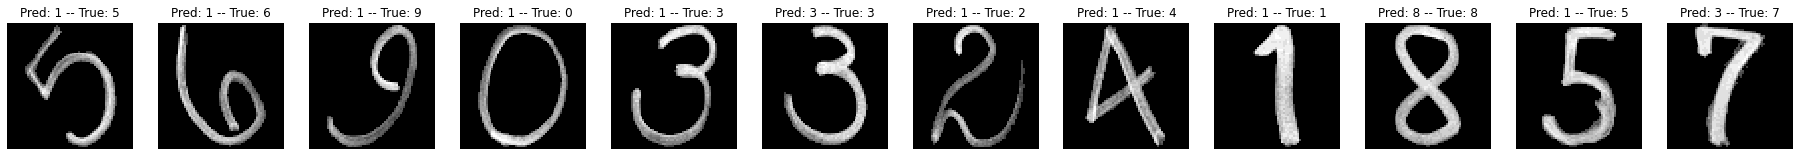

The accuracy with the new digits are: 0.25
The number of new digits well classified are:  3


In [ ]:
# Number of bins 
number_bins = 128
# Value of the bins
bins_vals = (0, 255)
pred_labels = []
_, axes = plt.subplots(nrows=1, ncols=12, figsize=(32, 32))
for ax, image, label in zip(axes, list_images, true_labels):
  # Resize image
  image_r = format_img(image)
  # Processing
  lbp_hist = preprocesando_lbp(image_r)
  # Compute histogram
  curr_hist = compute_hist(lbp_hist, number_bins, bins_vals)
  curr_hist = np.array(curr_hist).reshape(1, -1)
  res = mlp_stored_lbp.predict(curr_hist)[0]
  pred_labels.append(res)
  ax.set_axis_off()
  ax.imshow(image_r, cmap =  'gray', interpolation='nearest')
  ax.set_title('Pred: {} -- True: {}'.format(res, label))
plt.show()
true_pred = sum(1 for x,y in zip(pred_labels, true_labels) if x == y) 
print('The accuracy with the new digits are: {}'.format(true_pred/ float(len(true_labels))))
print('The number of new digits well classified are: ',true_pred)

Finally, we tested the same numbers with the MLP trained with LBP features, obtaining an accuracy of 25%, a value much lower than the HOG features MLP.

## Conclusion

The MLP trained with HOG features preformed better in the prediction of the new digits against the MLP with LBP features. As Nuah says in [1] both HOG and LBP attempt to use the same type of information: gradients around a pixel. The differences between these two is how each algorithm uses the gradient information, and this may have a significative role in the prediction task shown in the results above. LBP is commonly used for face recognition with very good results in this area. Finally HOG and LBP capture different kinds of information, which could make them complementary to each other and extremely powerful for different tasks. As HOG detects structure rather than texture (LBP), the structure seems to be useful information in the task of digits classification as numbers have different shapes and forms while compared with texture, there is few color information which might be attributed to the poor performance obtained with LBP. 


[1]NuaH, Comparing HOG and LBP (2015), https://nuah.livejournal.com/313715.html